In [1]:
from regression import *
from zkrp import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
## 导入数据 Finance data
'''
Variables:
	  Sector (concept): as listed; nu = size of sector
      Y1 = Job Cost, interval [a1, b1]
	  Y2 = Job Code, interval [a2, b2]
	  Y3 = Activity Code, interval [a3, b3]
	  Y4 = Monthly Cost, interval [a4, b4]
	  Y5 = Annual Budget, interval [a5, b5]
'''

file ="data/Finance data"
f = open(file)
column_name = ['u', 'sector', 'a1', 'b1', 'a2', 'b2', 'a3', 'b3', 'a4', 'b4', 'a5', 'b5', 'nu']
data = pd.read_csv(f, sep='\s+', names=column_name) #设置列名和 默认以多个空格来识别数据
n = data.shape[0]
y_l = data['a1'].values.reshape(n,1)
y_u = data['b1'].values.reshape(n,1)
y_c = y_l/2 + y_u/2
y_r = y_u/2 - y_l/2
x1_l = data['a2'].values
x1_u = data['b2'].values
x1_c = x1_l/2 + x1_u/2
x2_l = data['a3'].values
x2_u = data['b3'].values
x2_c = x2_l/2 + x2_u/2
x3_l = np.log(data['a4'].values)
x3_u = np.log(data['b4'].values)
x3_c = x3_l/2 + x3_u/2
x4_l = np.log(data['a5'].values)
x4_u = np.log(data['b5'].values)
x4_c = x4_l/2 + x4_u/2

## 变量太少，将nu变量随机Musk, 作为自变量
x5_l = data['nu'].values - np.array([np.random.randint(i/2) for i in data['nu'].values])
x5_u = data['nu'].values + np.array([np.random.randint(i/2) for i in data['nu'].values])
x5_c = x5_l/2 + x5_u/2

## 加入交叉项
x12_l = x1_l * x2_l
x12_u = x1_u * x2_u
x12_c = x12_l/2 + x12_u/2

x13_l = x1_l * x3_l
x13_u = x1_u * x3_u
x13_c = x13_l/2 + x13_u/2

x14_l = x1_l * x4_l
x14_u = x1_u * x4_u
x14_c = x14_l/2 + x14_u/2

x15_l = x1_l * x5_l
x15_u = x1_u * x5_u
x15_c = x15_l/2 + x15_u/2

x23_l = x2_l * x3_l
x23_u = x2_u * x3_u
x23_c = x23_l/2 + x23_u/2

x24_l = x2_l * x4_l
x24_u = x2_u * x4_u
x24_c = x24_l/2 + x24_u/2

x25_l = x2_l * x5_l
x25_u = x2_u * x5_u
x25_c = x25_l/2 + x25_u/2

x34_l = x3_l * x4_l
x34_u = x3_u * x4_u
x34_c = x34_l/2 + x34_u/2

x35_l = x3_l * x5_l
x35_u = x3_u * x5_u
x35_c = x35_l/2 + x35_u/2

x45_l = x4_l * x5_l
x45_u = x4_u * x5_u
x45_c = x45_l/2 + x45_u/2

x_l = np.vstack((x1_l, x2_l, x3_l, x4_l, x5_l, x12_l, x13_l, x14_l, x15_l, x23_l, x24_l, x25_l, x34_l, x35_l, x45_l)).T
x_u = np.vstack((x1_u, x2_u, x3_u, x4_u, x5_u, x12_u, x13_u, x14_u, x15_u, x23_u, x24_u, x25_u, x34_u, x35_u, x45_u)).T
x_c = np.vstack((x1_c, x2_c, x3_c, x4_c, x5_c, x12_c, x13_c, x14_c, x15_c, x23_c, x24_c, x25_c, x34_c, x35_c, x45_c)).T
x_r = x_u/2 - x_l/2

In [ ]:
 # Mm.fit_transform(x_u/2 + x_l/2)


In [ ]:
# beta_cm = CM_Method(x_c, y_c)
# beta_crm_c, beta_crm_r = CRM_Method(x_c, y_c, x_r, y_r)
# beta_ccrm_c, beta_ccrm_r = CCRM_Method(x_c, y_c, x_r, y_r)

In [ ]:
# yhat_cm_l = predict(x_l, beta_cm)
# yhat_cm_u = predict(x_u, beta_cm)
# yhat_cm_r = (yhat_cm_u - yhat_cm_l) / 2
# yhat_cm_c = (yhat_cm_u + yhat_cm_l) / 2
#
# yhat_crm_r = predict(x_r, beta_crm_r)
# yhat_crm_c = predict(x_c, beta_crm_c)
# yhat_crm_u = yhat_crm_c + yhat_crm_r / 2
# yhat_crm_l = yhat_crm_c - yhat_crm_r / 2
#
# yhat_ccrm_r = predict(x_r, beta_ccrm_r)
# yhat_ccrm_c = predict(x_c, beta_ccrm_c)
# yhat_ccrm_u = yhat_ccrm_c + yhat_ccrm_r / 2
# yhat_ccrm_l = yhat_ccrm_c - yhat_ccrm_r / 2

In [ ]:
# x_list = [np.vstack((x1_l, x1_u)).T,np.vstack((x2_l, x2_u)).T,np.vstack((x3_l, x3_u)).T,np.vstack((x4_l, x4_u)).T,np.vstack((x5_l, x5_u)).T]
x_list = [np.vstack((x_l[:,i], x_u[:,i])).T for i in range(x_l.shape[1])]

In [ ]:
# 画出y和x1 的cor
x1 = np.vstack((x1_l, x1_u)).T
y = np.hstack((y_l, y_u))
real_x1_y = np.vstack((np.mean(x1,axis=1), np.mean(y,axis=1))).T
range_x1_y = np.vstack((x1[:,1]/2 - x1[:,0]/2, y[:,1]/2 - y[:,0]/2)).T
show3(x1, y, path = './fig/Finance data x1 and y.jpg', real = real_x1_y, Cor = np.corrcoef(real_x1_y.T)[0][1], samples=x1.shape[0])

print("hausdorff-cor: %.4f" % frechet_correlation(x1, y))
print("midpoint-cor: %.4f" % np.corrcoef(real_x1_y.T)[0][1])
print("symbolic-cor: %.4f" % frechet_correlation(x1, y, method='symbolic'))
print("arithmetic-based-cor: %.4f" % frechet_correlation(x1, y, method='arithmetic-based'))
print("range-cor: %.4f" % np.corrcoef(range_x1_y.T)[0][1])

In [ ]:
x5 = np.vstack((x5_l, x5_u)).T
y = np.hstack((y_l, y_u))
real_x5_y = np.vstack((np.mean(x5,axis=1), np.mean(y,axis=1))).T
range_x5_y = np.vstack((x5[:,1]/2 - x5[:,0]/2, y[:,1]/2 - y[:,0]/2)).T
show3(x5, y, path = './fig/Finance data x5 and y.jpg', real = real_x5_y, Cor = np.corrcoef(real_x5_y.T)[0][1], samples=x5.shape[0])

print("hausdorff-cor: %.4f" % frechet_correlation(x5, y))
print("midpoint-cor: %.4f" % np.corrcoef(real_x5_y.T)[0][1])
print("symbolic-cor: %.4f" % frechet_correlation(x5, y, method='symbolic'))
print("arithmetic-based-cor: %.4f" % frechet_correlation(x5, y, method='arithmetic-based'))
print("range-cor: %.4f" % np.corrcoef(range_x5_y.T)[0][1])

In [ ]:
# Regression = [CM_Method, CRM_Method, CCRM_Method]
# Regression[0].__name__

In [ ]:
def reg_plot(x_list, y_l, y_u, y_c, y_r, var_list):
    cor_hf = [frechet_correlation(i, np.hstack((y_l, y_u))) for i in x_list]
    cor_s = [frechet_correlation(i, np.hstack((y_l, y_u)), method='symbolic') for i in x_list]
    cor_mp = [frechet_correlation(i, np.hstack((y_l, y_u)), method='midpoint') for i in x_list]
    cor_ab = [frechet_correlation(i, np.hstack((y_l, y_u)), method='arithmetic-based') for i in x_list]

    x_c = np.vstack(tuple([i[:,0]/2 + i[:,1]/2 for i in x_list])).T
    x_r = np.vstack(tuple([i[:,1]/2 - i[:,0]/2 for i in x_list])).T

    x_hf_c = x_c[:,np.argsort(-np.abs(cor_hf)).tolist()]
    x_hf_r = x_r[:,np.argsort(-np.abs(cor_hf)).tolist()]

    x_s_c = x_c[:,np.argsort(-np.abs(cor_s)).tolist()]
    x_s_r = x_r[:,np.argsort(-np.abs(cor_s)).tolist()]

    x_mp_c = x_c[:,np.argsort(-np.abs(cor_mp)).tolist()]
    x_mp_r = x_r[:,np.argsort(-np.abs(cor_mp)).tolist()]

    x_ab_c = x_c[:,np.argsort(-np.abs(cor_ab)).tolist()]
    x_ab_r = x_r[:,np.argsort(-np.abs(cor_ab)).tolist()]

    reglist = [CM_Method, CRM_Method, CCRM_Method]
    evallist = ['RMSE', 'NHD', 'IOR', 'DC']
    var_num = var_list

    fig, axes = plt.subplots(4, 3, figsize=(6,6), dpi=300)

    # for i, row in enumerate(axes):
    #     for j, col in enumerate(row):
    #         pass
    a = None
    b = None
    c = None

    for i in range(len(evallist)):
        for j in range(len(reglist)):
            y_h = []
            y_s = []
            y_m = []
            y_a = []
            for k in var_num:
                xx_hf_c = x_hf_c[:, 0:k]
                xx_hf_r = x_hf_r[:, 0:k]
                xx_s_c = x_s_c[:, 0:k]
                xx_s_r = x_s_r[:, 0:k]
                xx_mp_c = x_mp_c[:, 0:k]
                xx_mp_r = x_mp_r[:, 0:k]
                xx_ab_c = x_ab_c[:, 0:k]
                xx_ab_r = x_ab_r[:, 0:k]
                if reglist[j] == CM_Method:
                    beta_hf = CM_Method(xx_hf_c, y_c)
                    yhat_hf_c = predict(xx_hf_c, beta_hf)
                    yhat_hf_r = predict(xx_hf_r, beta_hf)

                    beta_s = CM_Method(xx_s_c, y_c)
                    yhat_s_c = predict(xx_s_c, beta_s)
                    yhat_s_r = predict(xx_s_r, beta_s)

                    beta_mp = CM_Method(xx_mp_c, y_c)
                    yhat_mp_c = predict(xx_mp_c, beta_mp)
                    yhat_mp_r = predict(xx_mp_r, beta_mp)

                    beta_ab = CM_Method(xx_ab_c, y_c)
                    yhat_ab_c = predict(xx_ab_c, beta_ab)
                    yhat_ab_r = predict(xx_ab_r, beta_ab)
                else:
                    beta_hf_c, beta_hf_r = reglist[j](xx_hf_c, y_c, xx_hf_r, y_r)
                    yhat_hf_c = predict(xx_hf_c, beta_hf_c)
                    yhat_hf_r = predict(xx_hf_r, beta_hf_r)

                    beta_s_c, beta_s_r = reglist[j](xx_s_c, y_c, xx_s_r, y_r)
                    yhat_s_c = predict(xx_s_c, beta_s_c)
                    yhat_s_r = predict(xx_s_r, beta_s_r)

                    beta_mp_c, beta_mp_r = reglist[j](xx_mp_c, y_c, xx_mp_r, y_r)
                    yhat_mp_c = predict(xx_mp_c, beta_mp_c)
                    yhat_mp_r = predict(xx_mp_r, beta_mp_r)

                    beta_ab_c, beta_ab_r = reglist[j](xx_ab_c, y_c, xx_ab_r, y_r)
                    yhat_ab_c = predict(xx_ab_c, beta_ab_c)
                    yhat_ab_r = predict(xx_ab_r, beta_ab_r)

                y_h.append(eval(yhat_hf_c, yhat_hf_r, y_c, y_r, method=evallist[i]))
                y_s.append(eval(yhat_s_c, yhat_s_r, y_c, y_r, method=evallist[i]))
                y_m.append(eval(yhat_mp_c, yhat_mp_r, y_c, y_r, method=evallist[i]))
                y_a.append(eval(yhat_ab_c, yhat_ab_r, y_c, y_r, method=evallist[i]))

            axes[i, j].plot(var_num, y_h, lw=1, label='Haus-Fre', color='darkorange')
            axes[i, j].plot(var_num, y_s, lw=1, label='Symbolic', color='steelblue', ls='-.')
            axes[i, j].plot(var_num, y_m, lw=1, label='Midpoint', color='limegreen', ls='--')
            axes[i, j].plot(var_num, y_a, lw=1, label='Arith-bas', color='red', ls=':')

            if i == 3:
                axes[i, j].set_xlabel(reglist[j].__name__)
            if j == 0:
                axes[i, j].set_ylabel(evallist[i])
            axes[i, j].grid(True, ls='-.')

            if i==0 and j ==2:
                axes[i, j].legend(loc='upper right', fontsize=7)

    # plt.legend(loc='best')
    plt.tight_layout()
    plt.show()


In [ ]:
reg_plot(x_list, y_l, y_u, y_c, y_r, var_list=[12,11,10,9,8,7,6,5,4,3])

In [ ]:
# p=20
# hhh=np.array([1,2,3])
# n = x.shape[0]
# y_l = x[p:,0]
# y_u = x[p:,1]
# y_c = y_u/2 + y_l/2
# y_r = y_u/2 - y_l/2
# x_list = [x[p-1-i:n-2-i, :] for i in range(p)]

In [ ]:
### 拟合 tesla 股票数据
### x 是原始数据，2列：high-low, 每一行是daily的interval
### return
def transf_data(x, p=20):
    n = x.shape[0]-p
    y_l = x[p:,0].reshape(n,1)
    y_u = x[p:,1].reshape(n,1)
    y_c = y_u/2 + y_l/2
    y_r = y_u/2 - y_l/2
    x_list = [x[p-1-i:n+p-1-i, :] for i in range(p)]
    return x_list, y_l, y_u, y_c, y_r

## 将负区间转化为正区间
def transf_data2(x1,x2):
    n = x1.shape[0]
    x_l = np.zeros((n,1))
    x_u = np.zeros((n,1))
    for i in range(x1.shape[0]):
        x_l[i][0] = min(x1.reshape(n)[i], x2.reshape(n)[i])
        x_u[i][0] = max(x1.reshape(n)[i], x2.reshape(n)[i])
    return x_l, x_u


In [ ]:
file ="data/tesla/TSLA.csv"
f = open(file)
column_name = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume']
tesla = pd.read_csv(f, sep=',', names=column_name).values #设置列名和 默认以多个空格来识别数据
tesla = tesla[1:,2:4].astype(float)
n = tesla.shape[0]
## 进行差分
tesla_c = tesla[:,0]/2 + tesla[:,1]/2
tesla_r = abs(tesla[:,0]/2 - tesla[:,1]/2)
d_tesla = np.zeros((n-1, 2))
for i in range(n-1):
    d_tesla[i,0] = tesla_c[i+1] - tesla_c[i] - abs(tesla_r[i+1] - tesla_r[i])
    d_tesla[i,1] = tesla_c[i+1] - tesla_c[i] + abs(tesla_r[i+1] - tesla_r[i])

In [ ]:
tesla_x, tesla_yl, tesla_yu, tesla_yc, tesla_yr = transf_data(d_tesla)

In [ ]:
tesla_xlist = [np.hstack(transf_data2(i[:,0], i[:,1])) for i in tesla_x]
tesla_y_l, tesla_y_u = transf_data2(tesla_yl, tesla_yu)

tesla_y_c = tesla_y_u/2 + tesla_y_l/2
tesla_y_r = tesla_y_u/2 - tesla_y_l/2

In [ ]:
# np.hstack((tesla_y_l, tesla_y_u))

In [ ]:
# tesla_xlist[0].shape

In [ ]:
reg_plot(tesla_xlist, tesla_y_l, tesla_y_u, tesla_y_c, tesla_y_r, var_list=[15,14,13,12,11,10,9,8,7,6,5,4,3,2])

### Life expectancy 偏移量对比实验


In [ ]:
life_expect = pd.read_csv("data/Life Expectancy Data.csv", header=0)
life_expect = life_expect.dropna(axis=0, how='any')
y = life_expect['Life expectancy '].values
life_expect['Population'] = np.log(life_expect['Population'])
life_expect = life_expect.drop(columns=['Country', 'Status', 'Life expectancy '])

In [ ]:
def random_cover(x, method='random', sign_fixed = True):
    """
    将一列数据使用区间进行覆盖
    :param x: numpy(n,): 需要进行处理的数据
    :param method: string: 'random' 真值被随机覆盖, 'left' 真值大部分位于区间左侧, 'right' 真值大部分位于区间右侧
    :param sign_fixed: bool: 区间是否在零点同侧
    :return: numpy(n,2): 返回的区间
    """
    n = x.shape[0]
    xl = np.zeros((n,))
    xu = np.zeros((n,))
    for i in range(n):
        if sign_fixed:
            if x[i] >= 0:
                if method == 'random':
                    xl[i] = max(0, x[i] - abs(0.1 * x[i] * np.random.randn()))
                    xu[i] = x[i] + abs(0.1 * x[i] * np.random.randn())
                elif method == 'left':
                    xl[i] = max(0, x[i] - abs(0.1 * x[i] * np.random.randn()))
                    xu[i] = x[i] + abs(0.3 * x[i] * np.random.randn())
                else:
                    xl[i] = max(0, x[i] - abs(0.3 * x[i] * np.random.randn()))
                    xu[i] = x[i] + abs(0.1 * x[i] * np.random.randn())
            else:
                if method == 'random':
                    xl[i] = x[i] - abs(0.1 * x[i] * np.random.randn())
                    xu[i] = min(0, x[i] + abs(0.1 * x[i] * np.random.randn()))
                elif method == 'left':
                    xl[i] = x[i] - abs(0.1 * x[i] * np.random.randn())
                    xu[i] = min(0, x[i] + abs(0.3 * x[i] * np.random.randn()))
                else:
                    xl[i] = x[i] - abs(0.3 * x[i] * np.random.randn())
                    xu[i] = min(0, x[i] + abs(0.1 * x[i] * np.random.randn()))
        else:
            if method == 'random':
                xl[i] = x[i] - abs(0.1 * x[i] * np.random.randn())
                xu[i] = x[i] + abs(0.1 * x[i] * np.random.randn())
            elif method == 'left':
                xl[i] = x[i] - abs(0.1 * x[i] * np.random.randn())
                xu[i] = x[i] + abs(0.3 * x[i] * np.random.randn())
            else:
                xl[i] = x[i] - abs(0.3 * x[i] * np.random.randn())
                xu[i] = x[i] + abs(0.1 * x[i] * np.random.randn())
    return np.vstack((xl,xu)).T



In [ ]:
xnames = life_expect.columns.values.tolist()

xlist_random = [random_cover(life_expect[i].values) for i in xnames]

xlist_left = [random_cover(life_expect[i].values, method='left') for i in xnames]

xlist_right = [random_cover(life_expect[i].values, method='right') for i in xnames]

y_random = random_cover(y)
y_left = random_cover(y, method='left')
y_right = random_cover(y, method='right')

In [ ]:
n = life_expect.shape[0]
y_random_l = y_random[:,0].reshape((n,1))
y_random_u = y_random[:,1].reshape((n,1))
y_random_c = y_random_u/2 + y_random_l/2
y_random_r = y_random_u/2 - y_random_l/2

##### 真实值相对于区间左偏

In [ ]:

reg_plot(xlist_left, y_random_l, y_random_u, y_random_c, y_random_r, var_list=[15,14,13,12,11,10,9,8,7,6,5,4,3,2])

##### 真实值相对于区间右偏

In [ ]:
reg_plot(xlist_right, y_random_l, y_random_u, y_random_c, y_random_r, var_list=[15,14,13,12,11,10,9,8,7,6,5,4,3,2])

##### 真实值相对于区间随机分布

In [ ]:
reg_plot(xlist_random, y_random_l, y_random_u, y_random_c, y_random_r, var_list=[15,14,13,12,11,10,9,8,7,6,5,4,3,2])


### Try HF_Method

In [ ]:
np.random.seed(0)
n = 50
x_r = abs(np.random.random(n)) * 2
x_c = np.random.random(n)* 10
x = np.vstack((x_c-x_r, x_c+x_r)).T

y_r = abs(x_r + 0.25 * np.random.randn(n))
y_c = 1/2 * x_c + 1 + 0.25 * np.random.randn(n)
y = np.vstack((y_c-y_r, y_c+y_r)).T

show3(x,y,real=np.vstack((x_c, y_c)).T,samples=15)

In [ ]:
result = HF_Method(x,y)
solution = result['x']
ahat = solution[0]
bhat = solution[1]
yhat = ahat * x + bhat

In [ ]:
show4(x,y,yhat,real=np.vstack((x_c, y_c)).T,samples=10)

In [ ]:
show3(y,yhat)

100%|██████████| 1649/1649 [00:09<00:00, 168.15it/s]


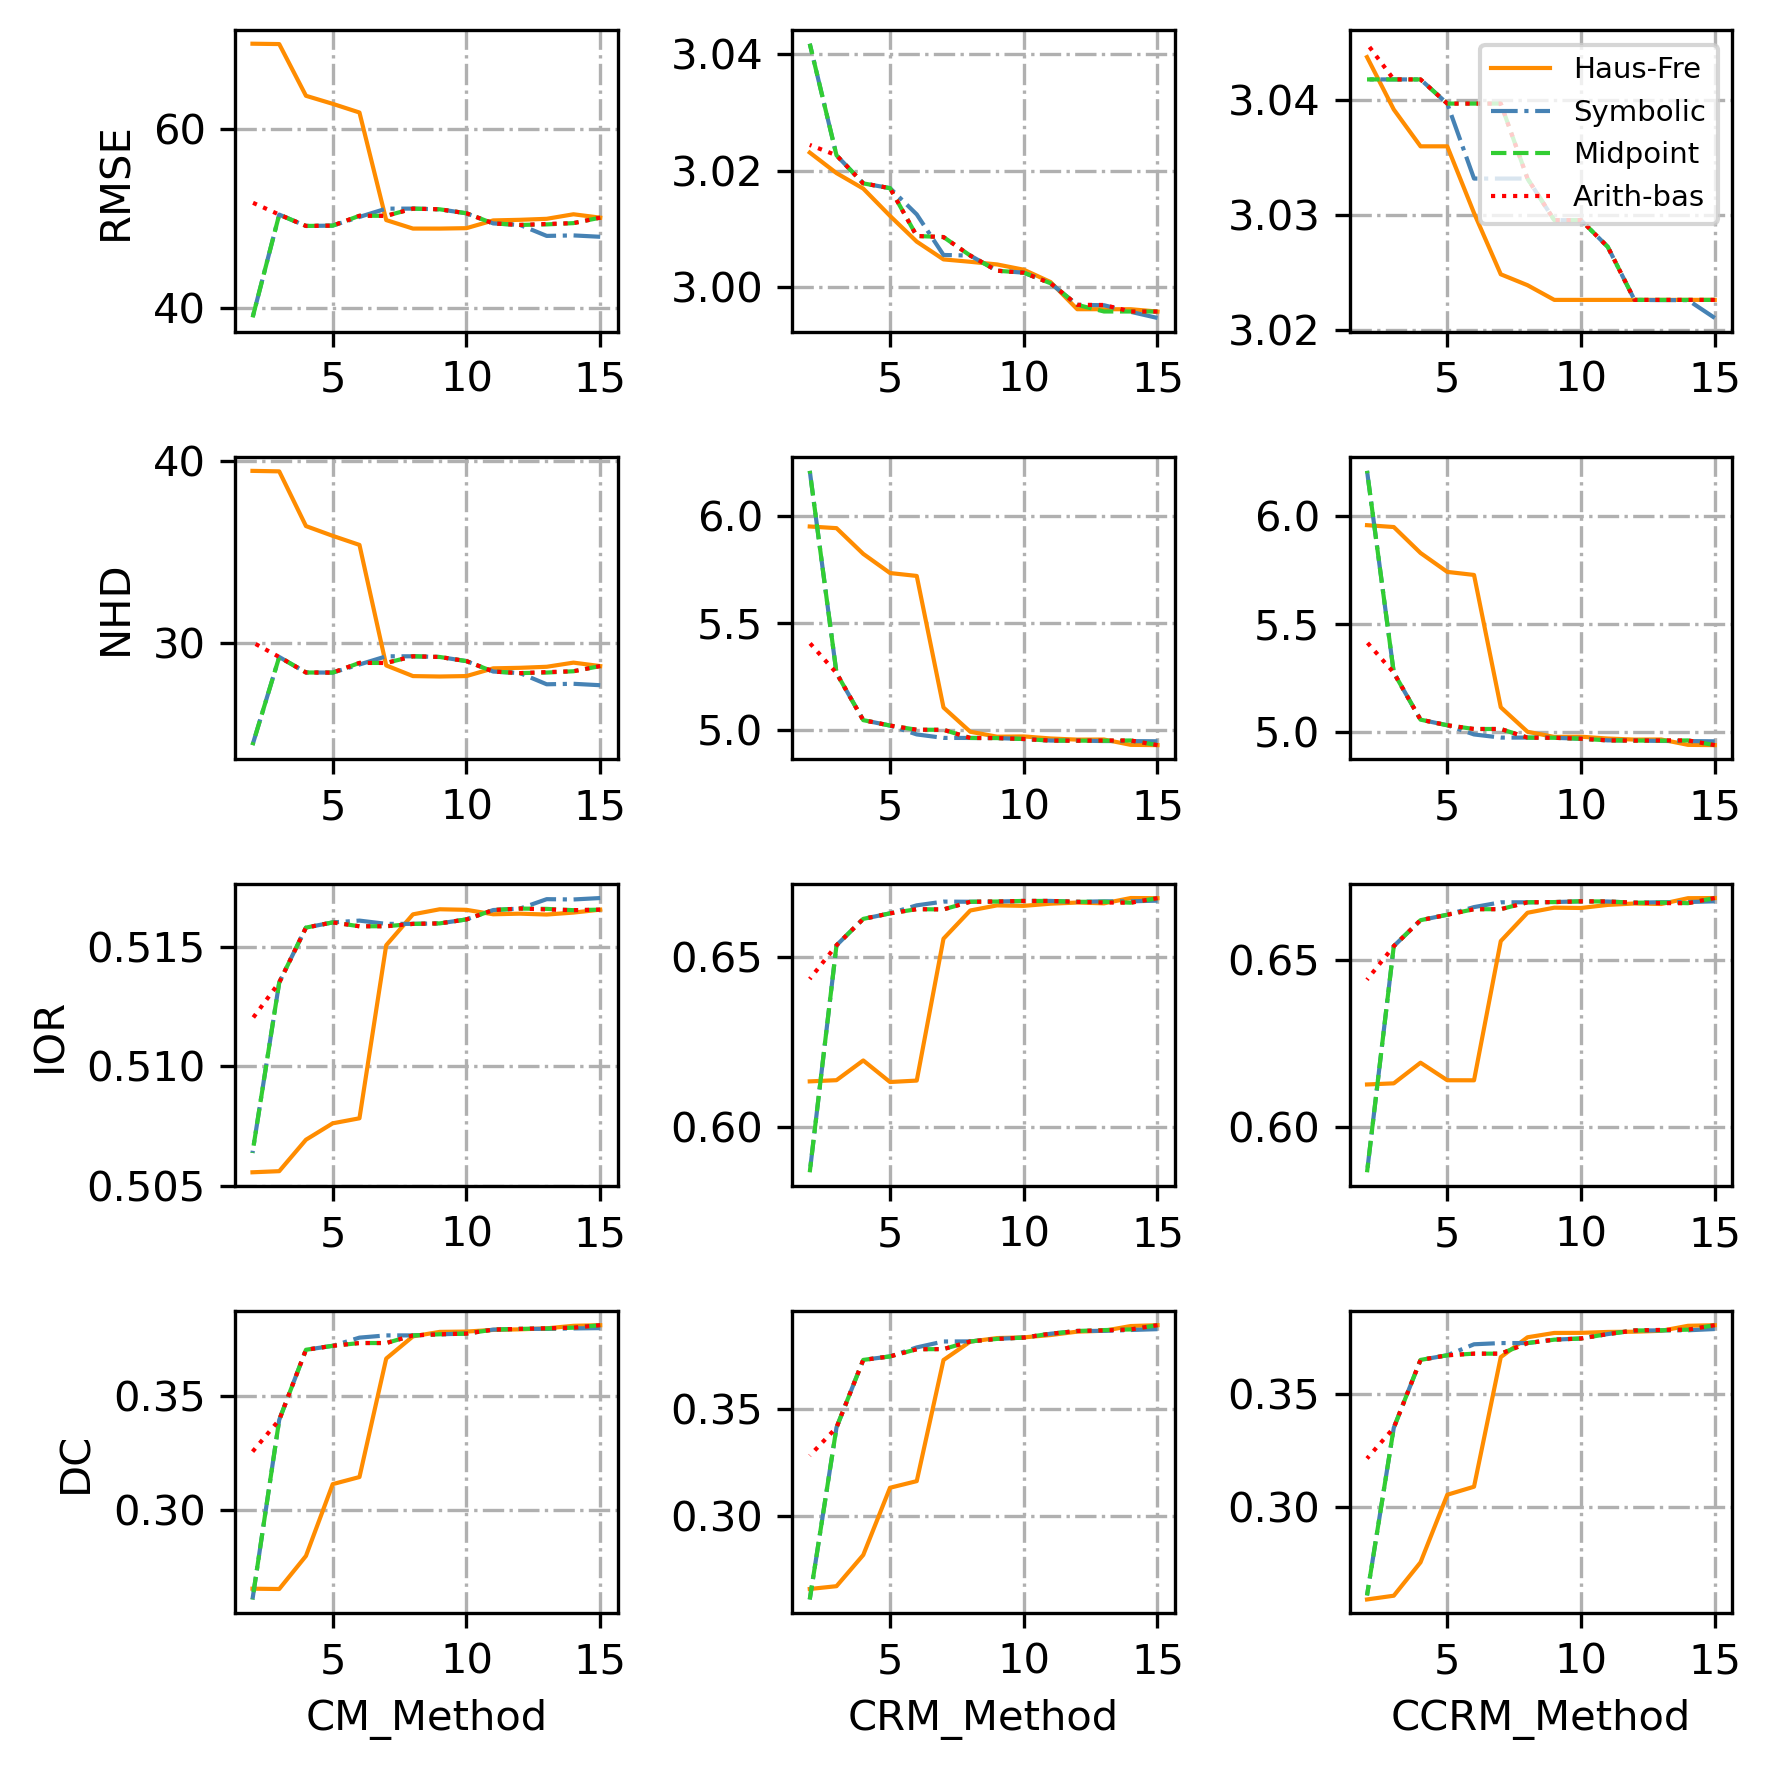

In [19]:
reg_plot(xlist_random, y_random_l, y_random_u, y_random_c, y_random_r, var_list=[15,14,13,12,11,10,9,8,7,6,5,4,3,2])


### Try HF_Method

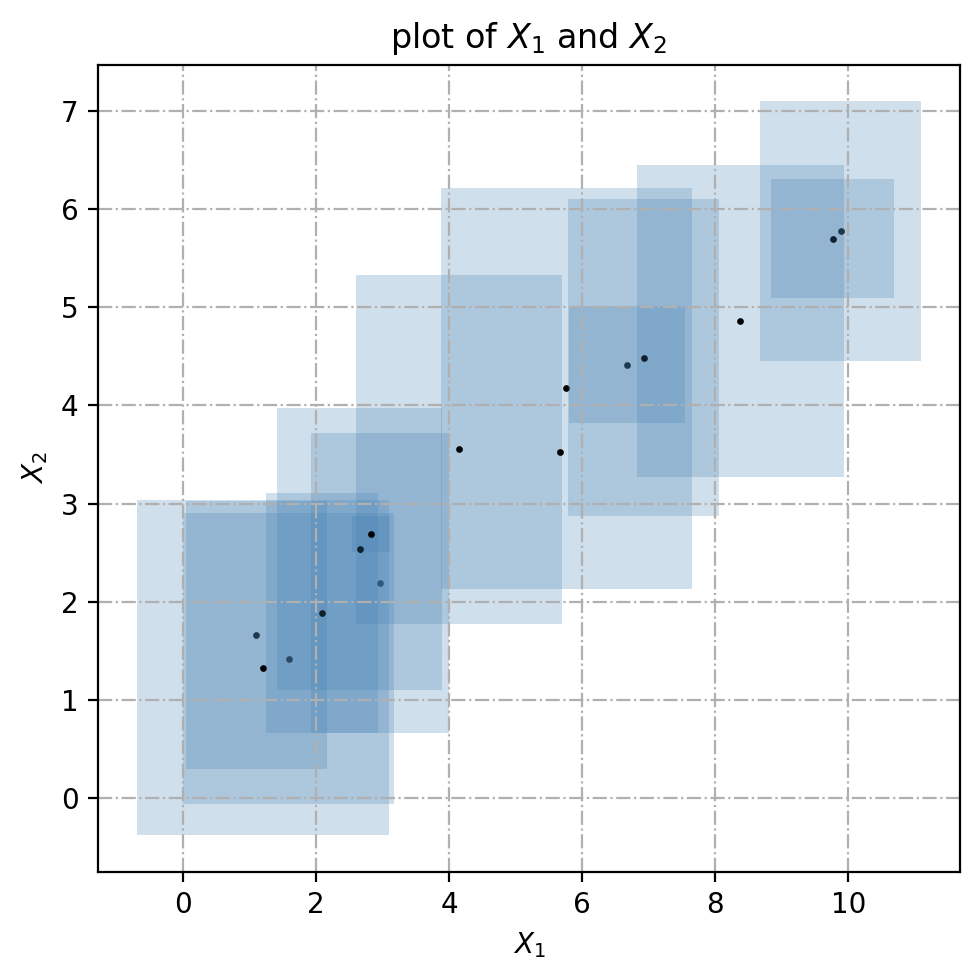

In [2]:
np.random.seed(0)
n = 50
x_r = abs(np.random.random(n)) * 2
x_c = np.random.random(n)* 10
x = np.vstack((x_c-x_r, x_c+x_r)).T

y_r = abs(x_r + 0.25 * np.random.randn(n))
y_c = 1/2 * x_c + 1 + 0.25 * np.random.randn(n)
y = np.vstack((y_c-y_r, y_c+y_r)).T

show3(x,y,real=np.vstack((x_c, y_c)).T,samples=15)

In [ ]:
a_c_hat, b_c_hat, a_r_hat, b_r_hat = HF_Method(x,y)
y_c_hat = a_c_hat * (x[:,1]/2 + x[:,0]/2) + b_c_hat
y_r_hat = a_r_hat * (x[:,1]/2 - x[:,0]/2) + b_r_hat
yhat = np.vstack((y_c_hat - y_r_hat, y_c_hat + y_r_hat)).T

In [ ]:
show4(x,y,yhat,real=np.vstack((x_c, y_c)).T,samples=10)

In [ ]:
show3(y,yhat)

#### 将 HF-Method 和 CM CRM CCRM 在单变量回归上做对比

In [ ]:
np.random.seed(123)
n = 1000
xx_r = abs(np.random.random(n)) * 2
xx_c = np.random.random(n)* 10
xx = np.vstack((xx_c-xx_r, xx_c+xx_r)).T
xx_r = xx_r.reshape((n,1))
xx_c = xx_c.reshape((n,1))

yy1_r = abs(xx_r + 0.25 * np.random.randn(n).reshape((n,1)))
yy1_c = 1/2 * xx_c + 1 + 0.15 * np.random.randn(n).reshape((n,1))
yy1 = np.hstack((yy1_c-yy1_r, yy1_c+yy1_r))

yy2_r = abs(xx_r + 0.25 * np.random.randn(n).reshape((n,1)))
yy2_c = 1/2 * xx_c + 1 + 0.5 * np.random.randn(n).reshape((n,1))
yy2 = np.hstack((yy2_c-yy2_r, yy2_c+yy2_r))

yy3_r = abs(xx_r + 0.25 * np.random.randn(n).reshape((n,1)))
yy3_c = 1/2 * xx_c + 1 + 2 * np.random.randn(n).reshape((n,1))
yy3 = np.hstack((yy3_c-yy3_r, yy3_c+yy3_r))

yy4_r = abs(xx_r + 0.5 * np.random.randn(n).reshape((n,1)))
yy4_c = 1/2 * xx_c + 1 + 0.5 * np.random.randn(n).reshape((n,1))
yy4 = np.hstack((yy4_c-yy4_r, yy4_c+yy4_r))

In [ ]:
show3(xx, yy1, real=np.hstack((xx_c, yy1_c)),samples=15)

In [ ]:
show3(xx,yy2,real=np.hstack((xx_c, yy2_c)),samples=15)

In [ ]:
show3(xx,yy3,real=np.hstack((xx_c, yy3_c)),samples=15)

In [ ]:
show3(xx,yy4,real=np.hstack((xx_c, yy4_c)),samples=15)

In [ ]:
# xxx = np.array([1,2,3,4,5]).reshape((5,1))
# yyy = np.array([2,3,5,8,11]).reshape((5,1))
# b = CM_Method(xxx,yyy)
# vec_one = np.ones(5)
# xxxx = np.insert(xxx, 0, vec_one, axis=1)
# xxxx.dot(b)

In [ ]:
### HF-Method


### 多次回归，做交叉验证

In [ ]:
# 五折交叉验证
fold = [0, 100, 200, 300, 400, 500, 600, 700, 800 , 900, 1000]
eval1_HF = []
eval2_HF = []
eval3_HF = []
eval4_HF = []
eval1_CM = []
eval2_CM = []
eval3_CM = []
eval4_CM = []
eval1_CRM = []
eval2_CRM = []
eval3_CRM = []
eval4_CRM = []
eval1_CCRM = []
eval2_CCRM = []
eval3_CCRM = []
eval4_CCRM = []
for i in range(10):
    x_test = xx[fold[i]:fold[i+1],:]
    x_c_test = xx_c[fold[i]:fold[i+1],:]
    x_r_test = xx_r[fold[i]:fold[i+1],:]
    y1_test = yy1[fold[i]:fold[i+1],:]
    y2_test = yy2[fold[i]:fold[i+1],:]
    y3_test = yy3[fold[i]:fold[i+1],:]
    y4_test = yy4[fold[i]:fold[i+1],:]
    y1_c_test = yy1_c[fold[i]:fold[i+1],:]
    y2_c_test = yy2_c[fold[i]:fold[i+1],:]
    y3_c_test = yy3_c[fold[i]:fold[i+1],:]
    y4_c_test = yy4_c[fold[i]:fold[i+1],:]
    y1_r_test = yy1_r[fold[i]:fold[i+1],:]
    y2_r_test = yy2_r[fold[i]:fold[i+1],:]
    y3_r_test = yy3_r[fold[i]:fold[i+1],:]
    y4_r_test = yy4_r[fold[i]:fold[i+1],:]

    x = np.delete(xx, list(np.arange(fold[i],fold[i+1])), axis=0)
    x_c = np.delete(xx_c, list(np.arange(fold[i],fold[i+1])), axis=0)
    x_r = np.delete(xx_r, list(np.arange(fold[i],fold[i+1])), axis=0)
    y1 = np.delete(yy1, list(np.arange(fold[i],fold[i+1])), axis=0)
    y2 = np.delete(yy2, list(np.arange(fold[i],fold[i+1])), axis=0)
    y3 = np.delete(yy3, list(np.arange(fold[i],fold[i+1])), axis=0)
    y4 = np.delete(yy4, list(np.arange(fold[i],fold[i+1])), axis=0)
    y1_c = np.delete(yy1_c, list(np.arange(fold[i],fold[i+1])), axis=0)
    y2_c = np.delete(yy2_c, list(np.arange(fold[i],fold[i+1])), axis=0)
    y3_c = np.delete(yy3_c, list(np.arange(fold[i],fold[i+1])), axis=0)
    y4_c = np.delete(yy4_c, list(np.arange(fold[i],fold[i+1])), axis=0)
    y1_r = np.delete(yy1_r, list(np.arange(fold[i],fold[i+1])), axis=0)
    y2_r = np.delete(yy2_r, list(np.arange(fold[i],fold[i+1])), axis=0)
    y3_r = np.delete(yy3_r, list(np.arange(fold[i],fold[i+1])), axis=0)
    y4_r = np.delete(yy4_r, list(np.arange(fold[i],fold[i+1])), axis=0)

    a1_c_hat, b1_c_hat, a1_r_hat, b1_r_hat = HF_Method(x,y1)
    a2_c_hat, b2_c_hat, a2_r_hat, b2_r_hat = HF_Method(x,y2)
    a3_c_hat, b3_c_hat, a3_r_hat, b3_r_hat = HF_Method(x,y3)
    a4_c_hat, b4_c_hat, a4_r_hat, b4_r_hat = HF_Method(x,y4)

    yhat1_c_HF = a1_c_hat * (x_test[:,1]/2 + x_test[:,0]/2) + b1_c_hat
    yhat1_r_HF = a1_r_hat * (x_test[:,1]/2 - x_test[:,0]/2) + b1_r_hat
    yhat2_c_HF = a2_c_hat * (x_test[:,1]/2 + x_test[:,0]/2) + b2_c_hat
    yhat2_r_HF = a2_r_hat * (x_test[:,1]/2 - x_test[:,0]/2) + b2_r_hat
    yhat3_c_HF = a3_c_hat * (x_test[:,1]/2 + x_test[:,0]/2) + b3_c_hat
    yhat3_r_HF = a3_r_hat * (x_test[:,1]/2 - x_test[:,0]/2) + b3_r_hat
    yhat4_c_HF = a4_c_hat * (x_test[:,1]/2 + x_test[:,0]/2) + b4_c_hat
    yhat4_r_HF = a4_r_hat * (x_test[:,1]/2 - x_test[:,0]/2) + b4_r_hat

    ### CM_Method
    hatBeta1_CM = CM_Method(x_c, y1_c)
    hatBeta2_CM = CM_Method(x_c, y2_c)
    hatBeta3_CM = CM_Method(x_c, y3_c)
    hatBeta4_CM = CM_Method(x_c, y4_c)

    yhat1_c_CM = predict(x_c_test, hatBeta1_CM)
    yhat1_r_CM = predict(x_r_test, hatBeta1_CM)
    yhat2_c_CM = predict(x_c_test, hatBeta2_CM)
    yhat2_r_CM = predict(x_r_test, hatBeta2_CM)
    yhat3_c_CM = predict(x_c_test, hatBeta3_CM)
    yhat3_r_CM = predict(x_r_test, hatBeta3_CM)
    yhat4_c_CM = predict(x_c_test, hatBeta4_CM)
    yhat4_r_CM = predict(x_r_test, hatBeta4_CM)

    ### CRM_Method
    hatBeta1_c_CRM, hatBeta1_r_CRM = CRM_Method(x_c, y1_c, x_r, y1_r)
    hatBeta2_c_CRM, hatBeta2_r_CRM = CRM_Method(x_c, y2_c, x_r, y2_r)
    hatBeta3_c_CRM, hatBeta3_r_CRM = CRM_Method(x_c, y3_c, x_r, y3_r)
    hatBeta4_c_CRM, hatBeta4_r_CRM = CRM_Method(x_c, y4_c, x_r, y4_r)

    yhat1_c_CRM = predict(x_c_test, hatBeta1_c_CRM)
    yhat1_r_CRM = predict(x_r_test, hatBeta1_r_CRM)
    yhat2_c_CRM = predict(x_c_test, hatBeta2_c_CRM)
    yhat2_r_CRM = predict(x_r_test, hatBeta2_r_CRM)
    yhat3_c_CRM = predict(x_c_test, hatBeta3_c_CRM)
    yhat3_r_CRM = predict(x_r_test, hatBeta3_r_CRM)
    yhat4_c_CRM = predict(x_c_test, hatBeta4_c_CRM)
    yhat4_r_CRM = predict(x_r_test, hatBeta4_r_CRM)

    ### CCRM_Method
    hatBeta1_c_CCRM, hatBeta1_r_CCRM = CCRM_Method(x_c, y1_c, x_r, y1_r)
    hatBeta2_c_CCRM, hatBeta2_r_CCRM = CCRM_Method(x_c, y2_c, x_r, y2_r)
    hatBeta3_c_CCRM, hatBeta3_r_CCRM = CCRM_Method(x_c, y3_c, x_r, y3_r)
    hatBeta4_c_CCRM, hatBeta4_r_CCRM = CCRM_Method(x_c, y4_c, x_r, y4_r)

    yhat1_c_CCRM = predict(x_c_test, hatBeta1_c_CCRM)
    yhat1_r_CCRM = predict(x_r_test, hatBeta1_r_CCRM)
    yhat2_c_CCRM = predict(x_c_test, hatBeta2_c_CCRM)
    yhat2_r_CCRM = predict(x_r_test, hatBeta2_r_CCRM)
    yhat3_c_CCRM = predict(x_c_test, hatBeta3_c_CCRM)
    yhat3_r_CCRM = predict(x_r_test, hatBeta3_r_CCRM)
    yhat4_c_CCRM = predict(x_c_test, hatBeta4_c_CCRM)
    yhat4_r_CCRM = predict(x_r_test, hatBeta4_r_CCRM)

    evallist = ['RMSE', 'NHD', 'IOR', 'DC']
    ### HF-Method
    eval1_HF.append([eval(y1_c_test, y1_r_test, yhat1_c_HF, yhat1_r_HF, method=i) for i in evallist])
    eval2_HF.append([eval(y2_c_test, y2_r_test, yhat2_c_HF, yhat2_r_HF, method=i) for i in evallist])
    eval3_HF.append([eval(y3_c_test, y3_r_test, yhat3_c_HF, yhat3_r_HF, method=i) for i in evallist])
    eval4_HF.append([eval(y4_c_test, y4_r_test, yhat4_c_HF, yhat4_r_HF, method=i) for i in evallist])
    ### CM-Method
    eval1_CM.append([eval(y1_c_test, y1_r_test, yhat1_c_CM, yhat1_r_CM, method=i) for i in evallist])
    eval2_CM.append([eval(y2_c_test, y2_r_test, yhat2_c_CM, yhat2_r_CM, method=i) for i in evallist])
    eval3_CM.append([eval(y3_c_test, y3_r_test, yhat3_c_CM, yhat3_r_CM, method=i) for i in evallist])
    eval4_CM.append([eval(y4_c_test, y4_r_test, yhat4_c_CM, yhat4_r_CM, method=i) for i in evallist])
    ### CRM-Method
    eval1_CRM.append([eval(y1_c_test, y1_r_test, yhat1_c_CRM, yhat1_r_CRM, method=i) for i in evallist])
    eval2_CRM.append([eval(y2_c_test, y2_r_test, yhat2_c_CRM, yhat2_r_CRM, method=i) for i in evallist])
    eval3_CRM.append([eval(y3_c_test, y3_r_test, yhat3_c_CRM, yhat3_r_CRM, method=i) for i in evallist])
    eval4_CRM.append([eval(y4_c_test, y4_r_test, yhat4_c_CRM, yhat4_r_CRM, method=i) for i in evallist])
    ### CCRM-Method
    eval1_CCRM.append([eval(y1_c_test, y1_r_test, yhat1_c_CCRM, yhat1_r_CCRM, method=i) for i in evallist])
    eval2_CCRM.append([eval(y2_c_test, y2_r_test, yhat2_c_CCRM, yhat2_r_CCRM, method=i) for i in evallist])
    eval3_CCRM.append([eval(y3_c_test, y3_r_test, yhat3_c_CCRM, yhat3_r_CCRM, method=i) for i in evallist])
    eval4_CCRM.append([eval(y4_c_test, y4_r_test, yhat4_c_CCRM, yhat4_r_CCRM, method=i) for i in evallist])

EV1_HF = [np.mean(np.array(eval1_HF),axis=0), np.var(np.array(eval1_HF),axis=0)]
EV2_HF = [np.mean(np.array(eval2_HF),axis=0), np.var(np.array(eval2_HF),axis=0)]
EV3_HF = [np.mean(np.array(eval3_HF),axis=0), np.var(np.array(eval3_HF),axis=0)]
EV4_HF = [np.mean(np.array(eval4_HF),axis=0), np.var(np.array(eval4_HF),axis=0)]
EV1_CM = [np.mean(np.array(eval1_CM),axis=0), np.var(np.array(eval1_CM),axis=0)]
EV2_CM = [np.mean(np.array(eval2_CM),axis=0), np.var(np.array(eval2_CM),axis=0)]
EV3_CM = [np.mean(np.array(eval3_CM),axis=0), np.var(np.array(eval3_CM),axis=0)]
EV4_CM = [np.mean(np.array(eval4_CM),axis=0), np.var(np.array(eval4_CM),axis=0)]
EV1_CRM = [np.mean(np.array(eval1_CRM),axis=0), np.var(np.array(eval1_CRM),axis=0)]
EV2_CRM = [np.mean(np.array(eval2_CRM),axis=0), np.var(np.array(eval2_CRM),axis=0)]
EV3_CRM = [np.mean(np.array(eval3_CRM),axis=0), np.var(np.array(eval3_CRM),axis=0)]
EV4_CRM = [np.mean(np.array(eval4_CRM),axis=0), np.var(np.array(eval4_CRM),axis=0)]
EV1_CCRM = [np.mean(np.array(eval1_CCRM),axis=0), np.var(np.array(eval1_CCRM),axis=0)]
EV2_CCRM = [np.mean(np.array(eval2_CCRM),axis=0), np.var(np.array(eval2_CCRM),axis=0)]
EV3_CCRM = [np.mean(np.array(eval3_CCRM),axis=0), np.var(np.array(eval3_CCRM),axis=0)]
EV4_CCRM = [np.mean(np.array(eval4_CCRM),axis=0), np.var(np.array(eval4_CCRM),axis=0)]

### arithmetic 方法中的数据生成模式

In [ ]:
np.random.seed(123)
n = 1000
xxx_c = np.random.random(n)
xxx_r = np.random.chisquare(1,size=n)
epsilon_c = np.random.random(n)
epsilon_r = np.random.chisquare(1,size=n)

xxx = np.vstack((xxx_c-xxx_r, xxx_c+xxx_r)).T
epsilon1 = np.vstack((epsilon_c-epsilon_r, epsilon_c+epsilon_r)).T
epsilon2 = np.vstack((4*epsilon_c-epsilon_r, 4*epsilon_c+epsilon_r)).T
xxx_r = xxx_r.reshape((n,1))
xxx_c = xxx_c.reshape((n,1))

yyy1 = 2 * xxx + epsilon1
yyy2 = 2 * xxx + epsilon2

yyy1_c = (yyy1[:, 1]/2 + yyy1[:, 0]/2).reshape((n,1))
yyy1_r = (yyy1[:, 1]/2 - yyy1[:, 0]/2).reshape((n,1))
yyy2_c = (yyy2[:, 1]/2 + yyy2[:, 0]/2).reshape((n,1))
yyy2_r = (yyy2[:, 1]/2 - yyy2[:, 0]/2).reshape((n,1))

In [ ]:
show3(xxx, yyy1, real=np.hstack((xxx_c, yyy1_c)),samples=15)
show3(xxx, yyy2, real=np.hstack((xxx_c, yyy2_c)),samples=15)

In [ ]:
# 五折交叉验证
fold = [0, 100, 200, 300, 400, 500, 600, 700, 800 , 900, 1000]
eval5_HF = []
eval6_HF = []
eval5_CM = []
eval6_CM = []
eval5_CRM = []
eval6_CRM = []
eval5_CCRM = []
eval6_CCRM = []

for i in range(10):
    x_test = xxx[fold[i]:fold[i+1],:]
    x_c_test = xxx_c[fold[i]:fold[i+1],:]
    x_r_test = xxx_r[fold[i]:fold[i+1],:]
    y1_test = yyy1[fold[i]:fold[i+1],:]
    y2_test = yyy2[fold[i]:fold[i+1],:]

    y1_c_test = yyy1_c[fold[i]:fold[i+1],:]
    y2_c_test = yyy2_c[fold[i]:fold[i+1],:]

    y1_r_test = yyy1_r[fold[i]:fold[i+1],:]
    y2_r_test = yyy2_r[fold[i]:fold[i+1],:]


    x = np.delete(xxx, list(np.arange(fold[i],fold[i+1])), axis=0)
    x_c = np.delete(xxx_c, list(np.arange(fold[i],fold[i+1])), axis=0)
    x_r = np.delete(xxx_r, list(np.arange(fold[i],fold[i+1])), axis=0)
    y1 = np.delete(yyy1, list(np.arange(fold[i],fold[i+1])), axis=0)
    y2 = np.delete(yyy2, list(np.arange(fold[i],fold[i+1])), axis=0)

    y1_c = np.delete(yyy1_c, list(np.arange(fold[i],fold[i+1])), axis=0)
    y2_c = np.delete(yyy2_c, list(np.arange(fold[i],fold[i+1])), axis=0)

    y1_r = np.delete(yyy1_r, list(np.arange(fold[i],fold[i+1])), axis=0)
    y2_r = np.delete(yyy2_r, list(np.arange(fold[i],fold[i+1])), axis=0)


    a1_c_hat, b1_c_hat, a1_r_hat, b1_r_hat = HF_Method(x,y1)
    a2_c_hat, b2_c_hat, a2_r_hat, b2_r_hat = HF_Method(x,y2)


    yhat1_c_HF = a1_c_hat * (x_test[:,1]/2 + x_test[:,0]/2) + b1_c_hat
    yhat1_r_HF = a1_r_hat * (x_test[:,1]/2 - x_test[:,0]/2) + b1_r_hat
    yhat2_c_HF = a2_c_hat * (x_test[:,1]/2 + x_test[:,0]/2) + b2_c_hat
    yhat2_r_HF = a2_r_hat * (x_test[:,1]/2 - x_test[:,0]/2) + b2_r_hat


    ### CM_Method
    hatBeta1_CM = CM_Method(x_c, y1_c)
    hatBeta2_CM = CM_Method(x_c, y2_c)

    yhat1_c_CM = predict(x_c_test, hatBeta1_CM)
    yhat1_r_CM = predict(x_r_test, hatBeta1_CM)
    yhat2_c_CM = predict(x_c_test, hatBeta2_CM)
    yhat2_r_CM = predict(x_r_test, hatBeta2_CM)


    ### CRM_Method
    hatBeta1_c_CRM, hatBeta1_r_CRM = CRM_Method(x_c, y1_c, x_r, y1_r)
    hatBeta2_c_CRM, hatBeta2_r_CRM = CRM_Method(x_c, y2_c, x_r, y2_r)


    yhat1_c_CRM = predict(x_c_test, hatBeta1_c_CRM)
    yhat1_r_CRM = predict(x_r_test, hatBeta1_r_CRM)
    yhat2_c_CRM = predict(x_c_test, hatBeta2_c_CRM)
    yhat2_r_CRM = predict(x_r_test, hatBeta2_r_CRM)

    ### CCRM_Method
    hatBeta1_c_CCRM, hatBeta1_r_CCRM = CCRM_Method(x_c, y1_c, x_r, y1_r)
    hatBeta2_c_CCRM, hatBeta2_r_CCRM = CCRM_Method(x_c, y2_c, x_r, y2_r)


    yhat1_c_CCRM = predict(x_c_test, hatBeta1_c_CCRM)
    yhat1_r_CCRM = predict(x_r_test, hatBeta1_r_CCRM)
    yhat2_c_CCRM = predict(x_c_test, hatBeta2_c_CCRM)
    yhat2_r_CCRM = predict(x_r_test, hatBeta2_r_CCRM)

    evallist = ['RMSE', 'NHD', 'IOR', 'DC']
    ### HF-Method
    eval5_HF.append([eval(y1_c_test, y1_r_test, yhat1_c_HF, yhat1_r_HF, method=i) for i in evallist])
    eval6_HF.append([eval(y2_c_test, y2_r_test, yhat2_c_HF, yhat2_r_HF, method=i) for i in evallist])

    ### CM-Method
    eval5_CM.append([eval(y1_c_test, y1_r_test, yhat1_c_CM, yhat1_r_CM, method=i) for i in evallist])
    eval6_CM.append([eval(y2_c_test, y2_r_test, yhat2_c_CM, yhat2_r_CM, method=i) for i in evallist])

    ### CRM-Method
    eval5_CRM.append([eval(y1_c_test, y1_r_test, yhat1_c_CRM, yhat1_r_CRM, method=i) for i in evallist])
    eval6_CRM.append([eval(y2_c_test, y2_r_test, yhat2_c_CRM, yhat2_r_CRM, method=i) for i in evallist])

    ### CCRM-Method
    eval5_CCRM.append([eval(y1_c_test, y1_r_test, yhat1_c_CCRM, yhat1_r_CCRM, method=i) for i in evallist])
    eval6_CCRM.append([eval(y2_c_test, y2_r_test, yhat2_c_CCRM, yhat2_r_CCRM, method=i) for i in evallist])


EV5_HF = [np.mean(np.array(eval5_HF),axis=0), np.var(np.array(eval5_HF),axis=0)]
EV6_HF = [np.mean(np.array(eval6_HF),axis=0), np.var(np.array(eval6_HF),axis=0)]

EV5_CM = [np.mean(np.array(eval5_CM),axis=0), np.var(np.array(eval5_CM),axis=0)]
EV6_CM = [np.mean(np.array(eval6_CM),axis=0), np.var(np.array(eval6_CM),axis=0)]

EV5_CRM = [np.mean(np.array(eval5_CRM),axis=0), np.var(np.array(eval5_CRM),axis=0)]
EV6_CRM = [np.mean(np.array(eval6_CRM),axis=0), np.var(np.array(eval6_CRM),axis=0)]

EV5_CCRM = [np.mean(np.array(eval5_CCRM),axis=0), np.var(np.array(eval5_CCRM),axis=0)]
EV6_CCRM = [np.mean(np.array(eval6_CCRM),axis=0), np.var(np.array(eval6_CCRM),axis=0)]

### 带入实际数据 Iris data

In [ ]:
# Variables:
#      Species (concept): setosa S (S1,...,S10),
# 	                    versicolor Ve (Ve1,...,Ve10)
# 						virginica Vi (Vi1,...,Vi10)
# 	 Y1 = Sepal Length, interval [a1, b1]
# 	 Y2 = Sepal Width, interval [a2, b2]
# 	 Y3 = Petal Length, interval [a3, b3]
# 	 Y4 = Petal Width, interval [a4, b4]

file ="data/Iris"
f = open(file)
column_name = ['u', 'species', 'a1', 'b1', 'a2', 'b2', 'a3', 'b3', 'a4', 'b4']
iris = pd.read_csv(f, sep='\s+', names=column_name)
a1 = iris['a1'].values
b1 = iris['b1'].values
a2 = iris['a2'].values
b2 = iris['b2'].values
a3 = iris['a3'].values
b3 = iris['b3'].values
a4 = iris['a4'].values
b4 = iris['b4'].values

iris_x1 = np.vstack((a1,b1)).T
iris_x2 = np.vstack((a2,b2)).T
iris_x3 = np.vstack((a3,b3)).T
iris_x4 = np.vstack((a4,b4)).T

In [ ]:
show3(iris_x1,iris_x2, varname=('iris_x1', 'iris_x2'))
show3(iris_x1,iris_x3, varname=('iris_x1', 'iris_x3'))
show3(iris_x1,iris_x4, varname=('iris_x1', 'iris_x4'))
show3(iris_x2,iris_x3, varname=('iris_x2', 'iris_x3'))
show3(iris_x2,iris_x4, varname=('iris_x2', 'iris_x4'))
show3(iris_x3,iris_x4, varname=('iris_x3', 'iris_x4'))

In [ ]:
file ="data/mushroom"
f = open(file)
column_name = ['u', 'species', 'a1', 'b1', 'a2', 'b2', 'a3', 'b3', 'a4', 'Edibility']
mushroom = pd.read_csv(f, sep='\s+', names=column_name)
a1 = mushroom['a1'].values
b1 = mushroom['b1'].values
a2 = mushroom['a2'].values
b2 = mushroom['b2'].values
a3 = mushroom['a3'].values
b3 = mushroom['b3'].values
mushroom_x1 = np.vstack((a1,b1)).T
mushroom_x2 = np.vstack((a2,b2)).T
mushroom_x3 = np.vstack((a3,b3)).T
show3(mushroom_x1,mushroom_x2, varname=('mushroom_x1', 'mushroom_x2'))
show3(mushroom_x1,mushroom_x3, varname=('mushroom_x1', 'mushroom_x3'))
show3(mushroom_x2,mushroom_x3, varname=('mushroom_x2', 'mushroom_x3'))

### arithmetic 方法中的数据生成模式

In [8]:
np.random.seed(123)
n = 1000
xxx_c = np.random.random(n)
xxx_r = np.random.chisquare(1,size=n)
epsilon_c = np.random.random(n)
epsilon_r = np.random.chisquare(1,size=n)

xxx = np.vstack((xxx_c-xxx_r, xxx_c+xxx_r)).T
epsilon1 = np.vstack((epsilon_c-epsilon_r, epsilon_c+epsilon_r)).T
epsilon2 = np.vstack((4*epsilon_c-epsilon_r, 4*epsilon_c+epsilon_r)).T
xxx_r = xxx_r.reshape((n,1))
xxx_c = xxx_c.reshape((n,1))

yyy1 = 2 * xxx + epsilon1
yyy2 = 2 * xxx + epsilon2

yyy1_c = (yyy1[:, 1]/2 + yyy1[:, 0]/2).reshape((n,1))
yyy1_r = (yyy1[:, 1]/2 - yyy1[:, 0]/2).reshape((n,1))
yyy2_c = (yyy2[:, 1]/2 + yyy2[:, 0]/2).reshape((n,1))
yyy2_r = (yyy2[:, 1]/2 - yyy2[:, 0]/2).reshape((n,1))

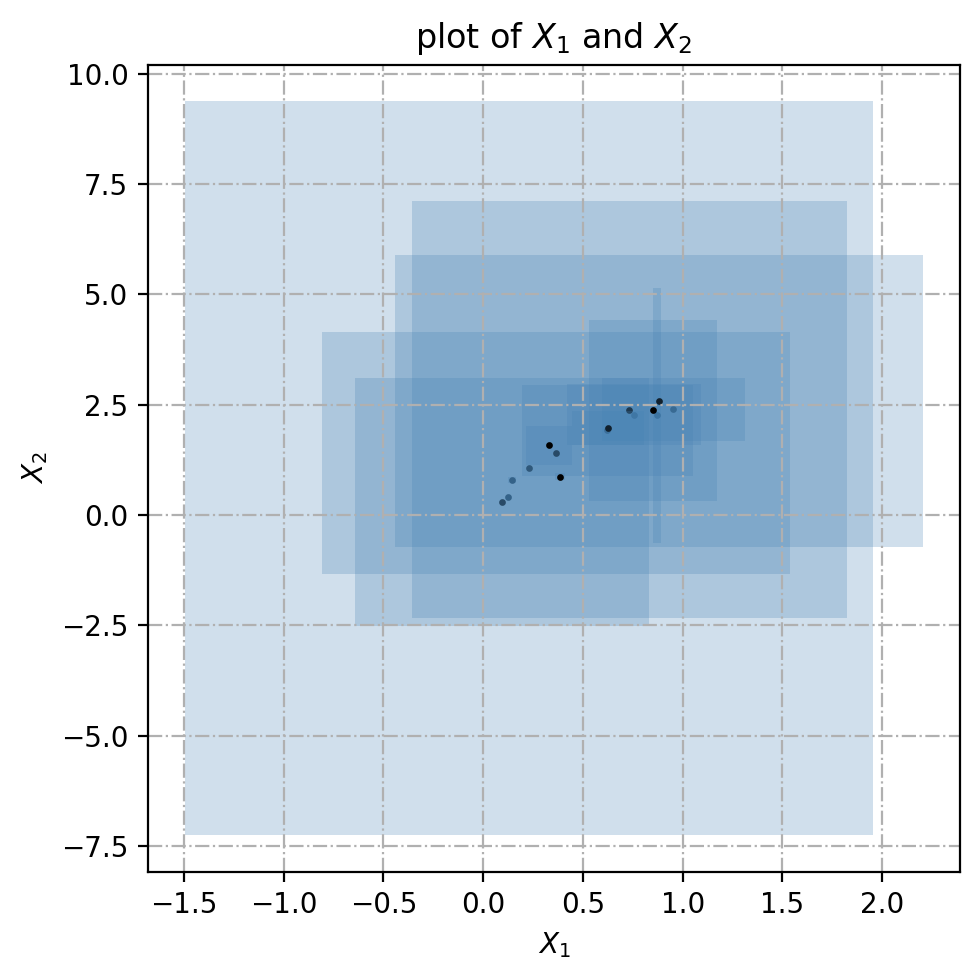

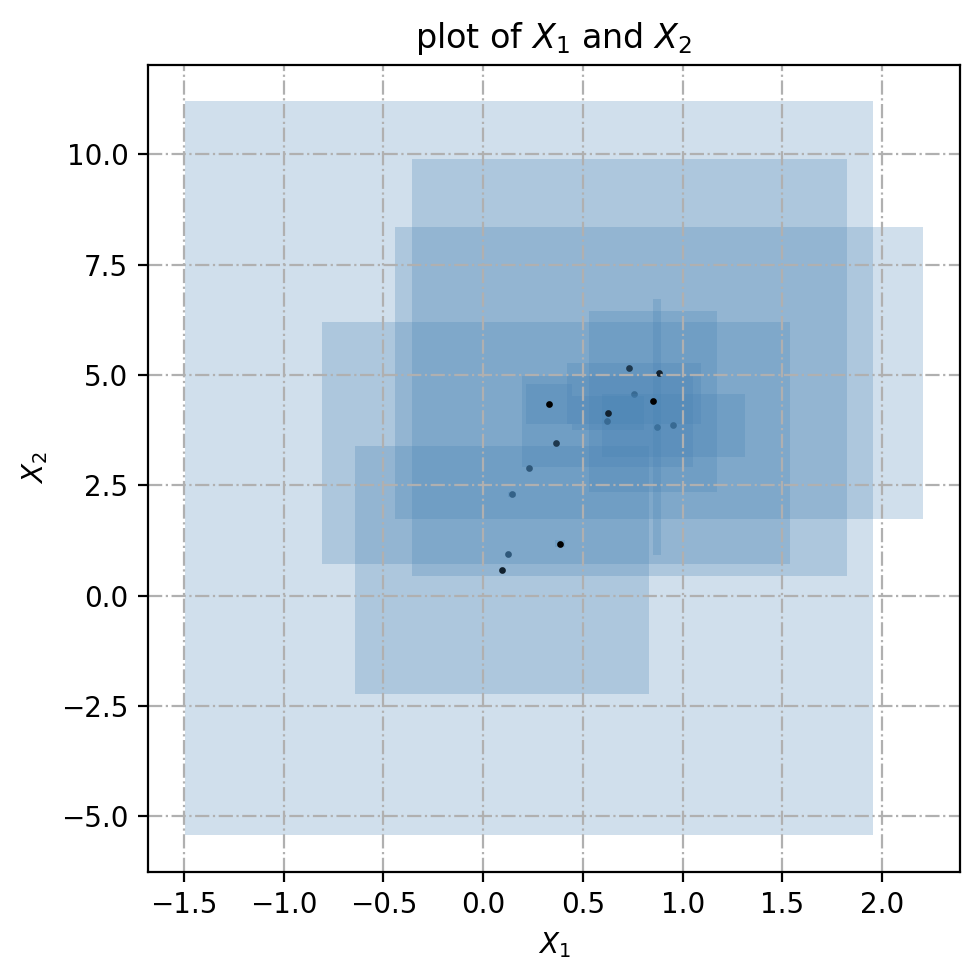

In [9]:
show3(xxx, yyy1, real=np.hstack((xxx_c, yyy1_c)),samples=15)
show3(xxx, yyy2, real=np.hstack((xxx_c, yyy2_c)),samples=15)

In [10]:
# 五折交叉验证
fold = [0, 100, 200, 300, 400, 500, 600, 700, 800 , 900, 1000]
eval5_HF = []
eval6_HF = []
eval5_CM = []
eval6_CM = []
eval5_CRM = []
eval6_CRM = []
eval5_CCRM = []
eval6_CCRM = []

for i in range(10):
    x_test = xxx[fold[i]:fold[i+1],:]
    x_c_test = xxx_c[fold[i]:fold[i+1],:]
    x_r_test = xxx_r[fold[i]:fold[i+1],:]
    y1_test = yyy1[fold[i]:fold[i+1],:]
    y2_test = yyy2[fold[i]:fold[i+1],:]

    y1_c_test = yyy1_c[fold[i]:fold[i+1],:]
    y2_c_test = yyy2_c[fold[i]:fold[i+1],:]

    y1_r_test = yyy1_r[fold[i]:fold[i+1],:]
    y2_r_test = yyy2_r[fold[i]:fold[i+1],:]


    x = np.delete(xxx, list(np.arange(fold[i],fold[i+1])), axis=0)
    x_c = np.delete(xxx_c, list(np.arange(fold[i],fold[i+1])), axis=0)
    x_r = np.delete(xxx_r, list(np.arange(fold[i],fold[i+1])), axis=0)
    y1 = np.delete(yyy1, list(np.arange(fold[i],fold[i+1])), axis=0)
    y2 = np.delete(yyy2, list(np.arange(fold[i],fold[i+1])), axis=0)

    y1_c = np.delete(yyy1_c, list(np.arange(fold[i],fold[i+1])), axis=0)
    y2_c = np.delete(yyy2_c, list(np.arange(fold[i],fold[i+1])), axis=0)

    y1_r = np.delete(yyy1_r, list(np.arange(fold[i],fold[i+1])), axis=0)
    y2_r = np.delete(yyy2_r, list(np.arange(fold[i],fold[i+1])), axis=0)


    a1_c_hat, b1_c_hat, a1_r_hat, b1_r_hat = HF_Method(x,y1)
    a2_c_hat, b2_c_hat, a2_r_hat, b2_r_hat = HF_Method(x,y2)


    yhat1_c_HF = a1_c_hat * (x_test[:,1]/2 + x_test[:,0]/2) + b1_c_hat
    yhat1_r_HF = a1_r_hat * (x_test[:,1]/2 - x_test[:,0]/2) + b1_r_hat
    yhat2_c_HF = a2_c_hat * (x_test[:,1]/2 + x_test[:,0]/2) + b2_c_hat
    yhat2_r_HF = a2_r_hat * (x_test[:,1]/2 - x_test[:,0]/2) + b2_r_hat


    ### CM_Method
    hatBeta1_CM = CM_Method(x_c, y1_c)
    hatBeta2_CM = CM_Method(x_c, y2_c)

    yhat1_c_CM = predict(x_c_test, hatBeta1_CM)
    yhat1_r_CM = predict(x_r_test, hatBeta1_CM)
    yhat2_c_CM = predict(x_c_test, hatBeta2_CM)
    yhat2_r_CM = predict(x_r_test, hatBeta2_CM)


    ### CRM_Method
    hatBeta1_c_CRM, hatBeta1_r_CRM = CRM_Method(x_c, y1_c, x_r, y1_r)
    hatBeta2_c_CRM, hatBeta2_r_CRM = CRM_Method(x_c, y2_c, x_r, y2_r)


    yhat1_c_CRM = predict(x_c_test, hatBeta1_c_CRM)
    yhat1_r_CRM = predict(x_r_test, hatBeta1_r_CRM)
    yhat2_c_CRM = predict(x_c_test, hatBeta2_c_CRM)
    yhat2_r_CRM = predict(x_r_test, hatBeta2_r_CRM)

    ### CCRM_Method
    hatBeta1_c_CCRM, hatBeta1_r_CCRM = CCRM_Method(x_c, y1_c, x_r, y1_r)
    hatBeta2_c_CCRM, hatBeta2_r_CCRM = CCRM_Method(x_c, y2_c, x_r, y2_r)


    yhat1_c_CCRM = predict(x_c_test, hatBeta1_c_CCRM)
    yhat1_r_CCRM = predict(x_r_test, hatBeta1_r_CCRM)
    yhat2_c_CCRM = predict(x_c_test, hatBeta2_c_CCRM)
    yhat2_r_CCRM = predict(x_r_test, hatBeta2_r_CCRM)

    evallist = ['RMSE', 'NHD', 'IOR', 'DC']
    ### HF-Method
    eval5_HF.append([eval(y1_c_test, y1_r_test, yhat1_c_HF, yhat1_r_HF, method=i) for i in evallist])
    eval6_HF.append([eval(y2_c_test, y2_r_test, yhat2_c_HF, yhat2_r_HF, method=i) for i in evallist])

    ### CM-Method
    eval5_CM.append([eval(y1_c_test, y1_r_test, yhat1_c_CM, yhat1_r_CM, method=i) for i in evallist])
    eval6_CM.append([eval(y2_c_test, y2_r_test, yhat2_c_CM, yhat2_r_CM, method=i) for i in evallist])

    ### CRM-Method
    eval5_CRM.append([eval(y1_c_test, y1_r_test, yhat1_c_CRM, yhat1_r_CRM, method=i) for i in evallist])
    eval6_CRM.append([eval(y2_c_test, y2_r_test, yhat2_c_CRM, yhat2_r_CRM, method=i) for i in evallist])

    ### CCRM-Method
    eval5_CCRM.append([eval(y1_c_test, y1_r_test, yhat1_c_CCRM, yhat1_r_CCRM, method=i) for i in evallist])
    eval6_CCRM.append([eval(y2_c_test, y2_r_test, yhat2_c_CCRM, yhat2_r_CCRM, method=i) for i in evallist])


EV5_HF = [np.mean(np.array(eval5_HF),axis=0), np.var(np.array(eval5_HF),axis=0)]
EV6_HF = [np.mean(np.array(eval6_HF),axis=0), np.var(np.array(eval6_HF),axis=0)]

EV5_CM = [np.mean(np.array(eval5_CM),axis=0), np.var(np.array(eval5_CM),axis=0)]
EV6_CM = [np.mean(np.array(eval6_CM),axis=0), np.var(np.array(eval6_CM),axis=0)]

EV5_CRM = [np.mean(np.array(eval5_CRM),axis=0), np.var(np.array(eval5_CRM),axis=0)]
EV6_CRM = [np.mean(np.array(eval6_CRM),axis=0), np.var(np.array(eval6_CRM),axis=0)]

EV5_CCRM = [np.mean(np.array(eval5_CCRM),axis=0), np.var(np.array(eval5_CCRM),axis=0)]
EV6_CCRM = [np.mean(np.array(eval6_CCRM),axis=0), np.var(np.array(eval6_CCRM),axis=0)]

### 带入实际数据 Iris data

In [2]:
# Variables:
#      Species (concept): setosa S (S1,...,S10),
# 	                    versicolor Ve (Ve1,...,Ve10)
# 						virginica Vi (Vi1,...,Vi10)
# 	 Y1 = Sepal Length, interval [a1, b1]
# 	 Y2 = Sepal Width, interval [a2, b2]
# 	 Y3 = Petal Length, interval [a3, b3]
# 	 Y4 = Petal Width, interval [a4, b4]

file ="data/Iris"
f = open(file)
column_name = ['u', 'species', 'a1', 'b1', 'a2', 'b2', 'a3', 'b3', 'a4', 'b4']
iris = pd.read_csv(f, sep='\s+', names=column_name)
a1 = iris['a1'].values
b1 = iris['b1'].values
a2 = iris['a2'].values
b2 = iris['b2'].values
a3 = iris['a3'].values
b3 = iris['b3'].values
a4 = iris['a4'].values
b4 = iris['b4'].values

iris_x1 = np.vstack((a1,b1)).T
iris_x2 = np.vstack((a2,b2)).T
iris_x3 = np.vstack((a3,b3)).T
iris_x4 = np.vstack((a4,b4)).T

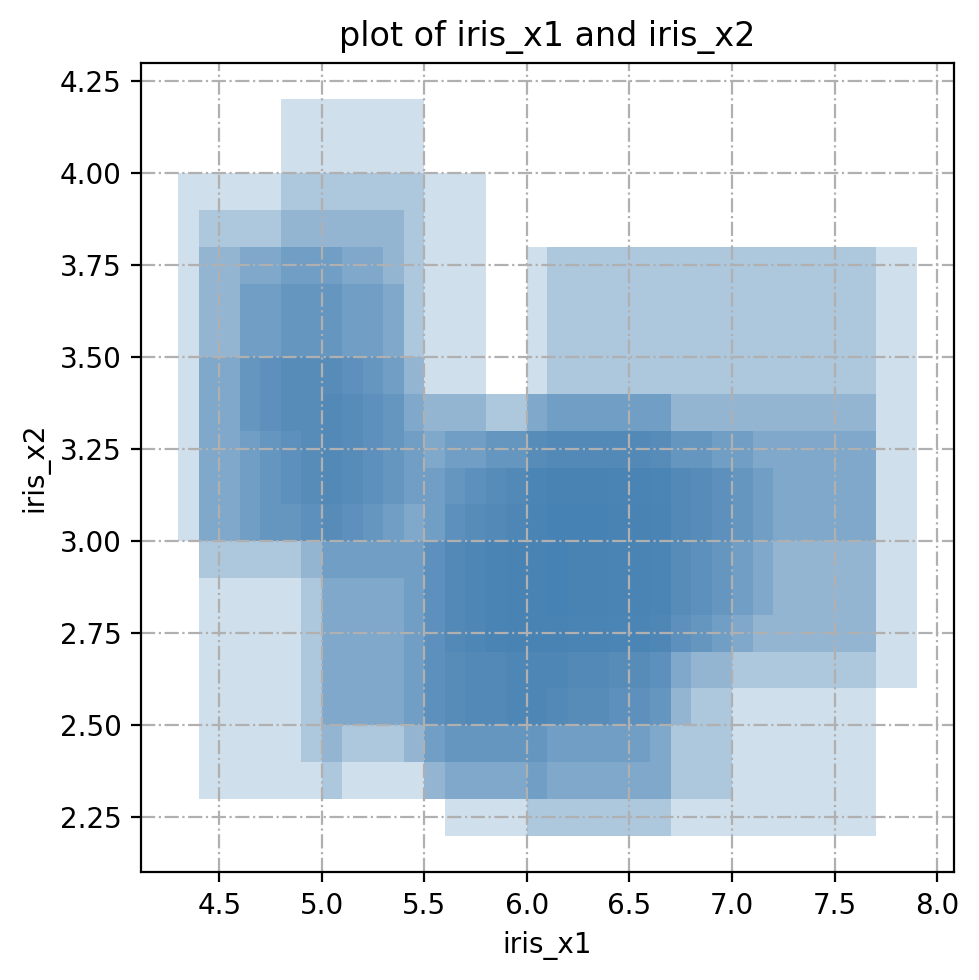

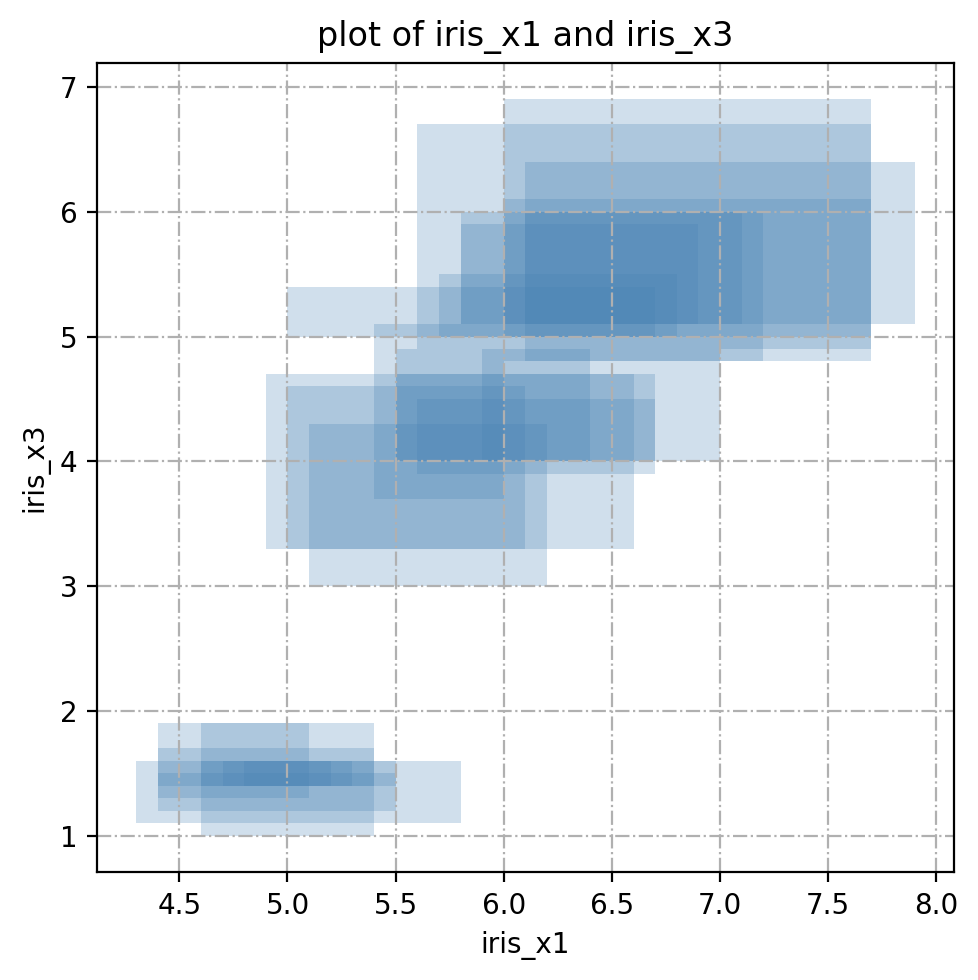

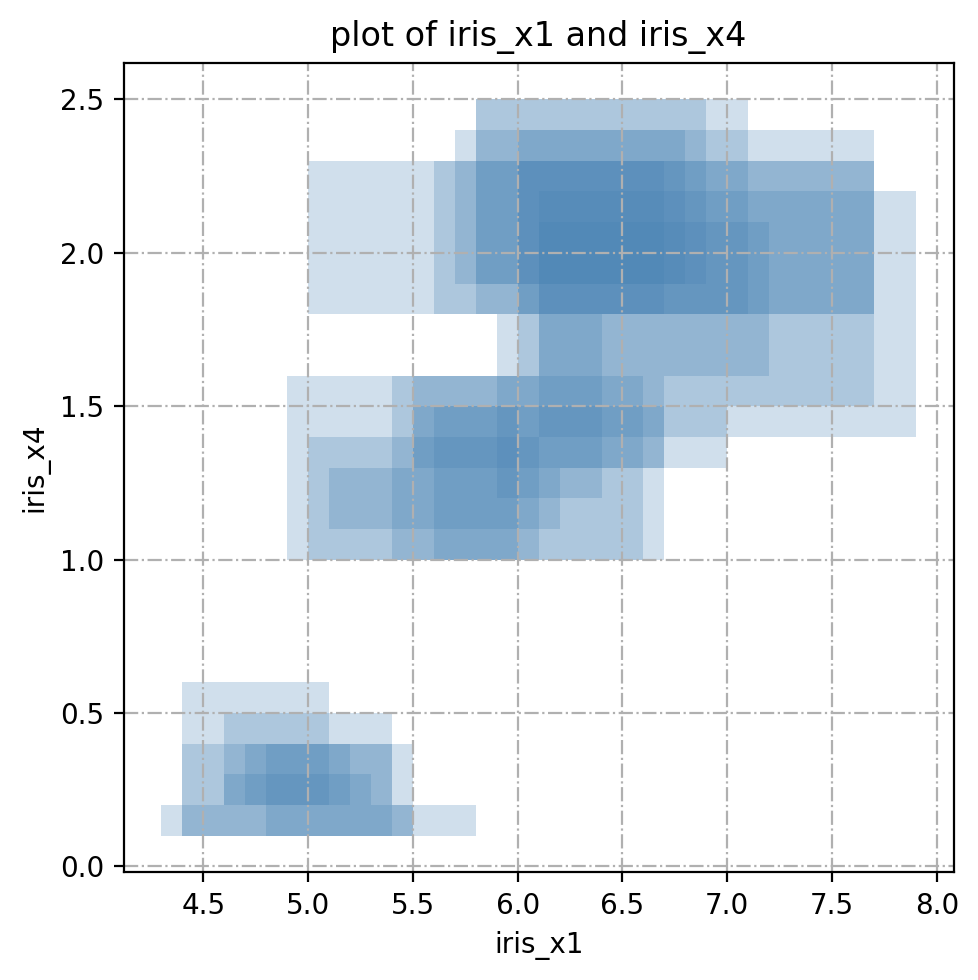

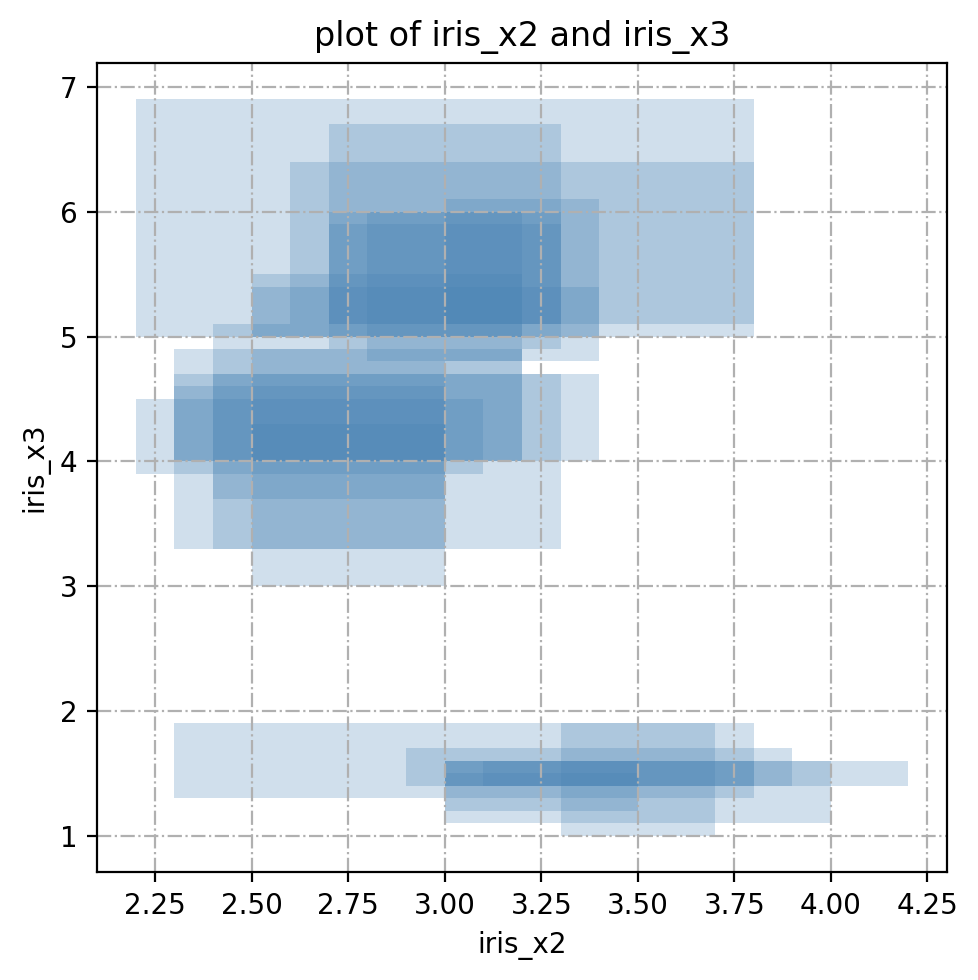

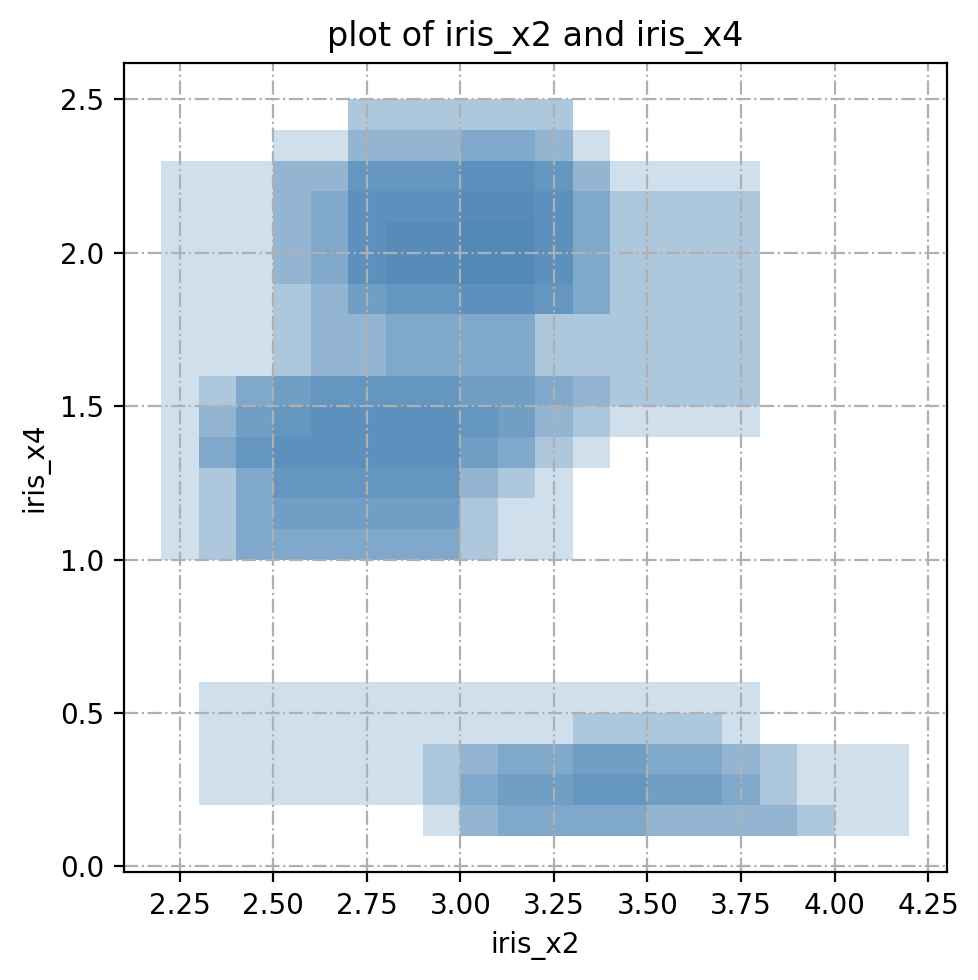

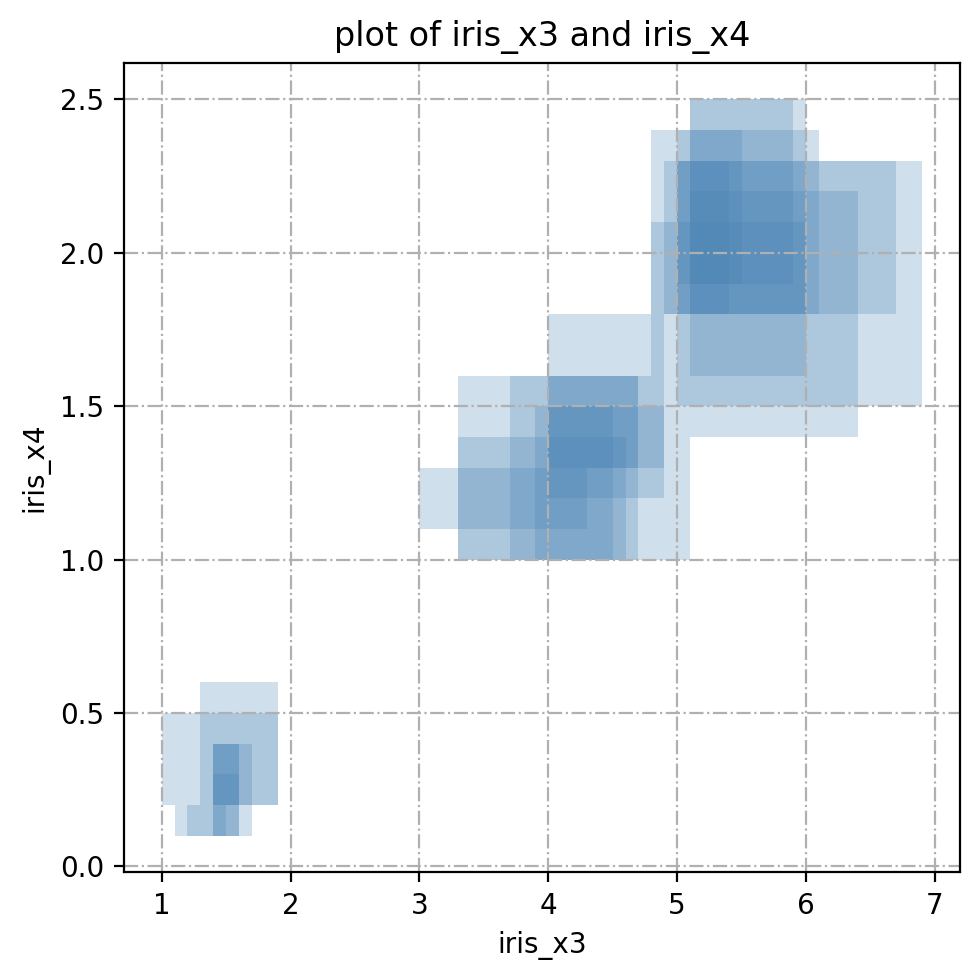

In [3]:
show3(iris_x1,iris_x2, varname=('iris_x1', 'iris_x2'))
show3(iris_x1,iris_x3, varname=('iris_x1', 'iris_x3'))
show3(iris_x1,iris_x4, varname=('iris_x1', 'iris_x4'))
show3(iris_x2,iris_x3, varname=('iris_x2', 'iris_x3'))
show3(iris_x2,iris_x4, varname=('iris_x2', 'iris_x4'))
show3(iris_x3,iris_x4, varname=('iris_x3', 'iris_x4'))